# Imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

import warnings
warnings.filterwarnings('ignore')

from utils import *

# Dataset: First Impressions

In [3]:
# Read the CSV file into a DataFrame
train_data = pd.read_csv('data\\train.csv', index_col=-1)
test_data = pd.read_csv('data\\test.csv', index_col=-1)

In [4]:
train = train_data.copy()
test = test_data.copy()
data = pd.concat([train, test], axis=0)
train

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
535805,Walk Away,rock,Tony Molina,2013,699,{},When you said you loved me\nDid you mean it th...
7519483,Gotta Make It Kid Naruto Rap,rap,Reece Lett,2021,4,{Sl!ck},Kid Naruto Rap\n[Hook]\nEverybody wants you to...
4892808,​this is what i asked for,pop,Elliot (DNK),2019,389,{},[Verse 1]\nPeople tell me I've changed\nI find...
1584150,Stealing Hearts,pop,Katie Armiger,2013,126,{},You've been warned about me\nDon't try to get ...
7639050,Get Ready,country,John Campbell Munro,1,2,{},[Verse 1]\nI can see the end is coming but I’v...
...,...,...,...,...,...,...,...
1702980,Manhattan,pop,Tijuana Sweetheart,2007,48,{},If I knew when I was young that I'd be older\n...
4802970,Belly Shit,rap,Lil Gotit,2019,3593,"{""Lil Troup""}",[Intro: Lil Gotit]\nCash\nWah-wah-wah\nWah-wah...
403929,The Four Loves,rock,Heath McNease,2014,301,{},[Verse 1]\nI was born inside a home\nThe young...


# Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134967 entries, 535805 to 6177674
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     134965 non-null  object
 1   tag       134967 non-null  object
 2   artist    134967 non-null  object
 3   year      134967 non-null  int64 
 4   views     134967 non-null  int64 
 5   features  134967 non-null  object
 6   lyrics    134967 non-null  object
dtypes: int64(2), object(5)
memory usage: 8.2+ MB


## Missing Values

In [6]:
train[train['title'].isna()]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7081034,NaN,pop,Las Aves,2019,9,{},There's something more\nIn this life for me an...
4701034,NaN,rock,Josh Gauton,2019,81,{},Let the waves crash over me\nMy sin [?] by lov...


In [11]:
train['title'].fillna('Unknwn', inplace=True)

## Duplicates

In [12]:
train[train.duplicated()]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,


In [13]:
train[train.duplicated(['lyrics'])] #178

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
1728585,Always,pop,Plumb,2007,336,{},Out of nowhere\nYou came\nFrom a little dust\n...
2205183,Paper Cup Words,pop,Elin Ruth,2015,62,{},I'll let it burn\nWords in a dirty paper cup\n...
3651429,On The Sunny Side Of The Street Duet,pop,Tony Bennett,2011,289,"{""Willie Nelson""}","Grab your coat, grab your hat\nLeave your worr..."
1171570,Fascist Smash Punch Out mix,pop,Kill Switch...Klick,2015,57,{},Learn to hate for hatreds sake\nLearn to kill ...
822768,Honeysuckle Rose,pop,Fats Waller and His Rhythm,2015,130,{},Every honey bee fills with jealousy\nWhen they...
...,...,...,...,...,...,...,...
1843064,In My Arms Bimbo Jones extended mix,pop,Plumb,2015,201,{},Your baby blues\nSo full of wonder\nYour curly...
2339574,Macklemore and Ryan Lewis’s “Wing$” 2,rap,TeachSkogs,2015,7,{},[Verse 1]\nI was seven years old\nWhen I got m...
859758,Jubilation This Thing Called Life K.C.s Camp P...,pop,Anything Box,2015,19,{},Every time I close my eyes\nI hide behind the ...


In [14]:
display(train[train.duplicated(['year', 'lyrics'])]) #85
display(train[train.duplicated(['views', 'lyrics'])]) #1

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
822768,Honeysuckle Rose,pop,Fats Waller and His Rhythm,2015,130,{},Every honey bee fills with jealousy\nWhen they...
2088621,Johnny b goode,pop,Big Fat Snake,2015,52,{},Deep down Louisiana close to New Orleans\nWay ...
521564,Saki’s “The Interlopers”,misc,Mr. Allen,2014,180,{},In a forest of mixed growth somewhere on ...
711378,Before Its Over,rock,Sixx:A.M.,2014,563,{},[Verse 1]\nWell the rain outside is pouring do...
5365945,Please Freedo Remix,pop,Samantha Harvey,2018,9,{},[Verse 1]\nI kinda always knew I was gonna be ...
...,...,...,...,...,...,...,...
750982,Zombie Rockin with Zombie club mix,pop,Adam Gre2,2015,48,{Amy},Another head hangs lowly\nChild is slowly take...
1843064,In My Arms Bimbo Jones extended mix,pop,Plumb,2015,201,{},Your baby blues\nSo full of wonder\nYour curly...
2339574,Macklemore and Ryan Lewis’s “Wing$” 2,rap,TeachSkogs,2015,7,{},[Verse 1]\nI was seven years old\nWhen I got m...


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2272369,Martin Luther King Jr’s “I Have A Dream”,misc,J. Erickson,2015,10,{},I am happy to join with you today in what will...


In [15]:
# train[train.duplicated(['title', 'artist', 'features', 'lyrics'])] #0
# train[train.duplicated(['title', 'artist', 'lyrics'])] #0
display(train[train.duplicated(['title', 'lyrics'])]) #24 --- covers
display(train[train.duplicated(['artist', 'lyrics'])]) #111 --- labeled versions ("acoustic", "remix", "extended")

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2205183,Paper Cup Words,pop,Elin Ruth,2015,62,{},I'll let it burn\nWords in a dirty paper cup\n...
2259614,Inferno,pop,I awake,2008,41,{},I have lost my way into the wood\nWhere am I t...
1542670,Firework,pop,Pearl and the Beard,2015,29,"{""Sophie Madeleine""}",Do you ever feel like a plastic bag\nDrifting ...
4630228,Twang,country,Mason Ramsey,2019,26107,{},"[Verse 1]\nYeah, she likes how sweet I like my..."
2961322,Othello Thug Notes,misc,Angelo Caballero,2017,21,{},"Summary\n\nYo, what it is? This week haters go..."
365464,Phillis Wheatley’s “On Being Brought from Afri...,misc,Dr. Katy Evans,2014,20,{},"'Twas mercy brought me from my Pagan land,\nTa..."
2960705,Othello Thug Notes,misc,Richard Betances,2017,11,{},"Summary\n\nYo, what it is? This week haters go..."
836555,Tricky Dicky,pop,Country Joe and the Fish,2015,189,{},"McDonald\n\nAlright, 1, 2; 1, 2, 3\nLate last ..."
796825,Gin House Blues,pop,Eric Burdon & The Animals,2015,115,{},"Stay away from me everybody, 'cause I'm in my ..."


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
1728585,Always,pop,Plumb,2007,336,{},Out of nowhere\nYou came\nFrom a little dust\n...
3651429,On The Sunny Side Of The Street Duet,pop,Tony Bennett,2011,289,"{""Willie Nelson""}","Grab your coat, grab your hat\nLeave your worr..."
1171570,Fascist Smash Punch Out mix,pop,Kill Switch...Klick,2015,57,{},Learn to hate for hatreds sake\nLearn to kill ...
711378,Before Its Over,rock,Sixx:A.M.,2014,563,{},[Verse 1]\nWell the rain outside is pouring do...
5365945,Please Freedo Remix,pop,Samantha Harvey,2018,9,{},[Verse 1]\nI kinda always knew I was gonna be ...
...,...,...,...,...,...,...,...
1843064,In My Arms Bimbo Jones extended mix,pop,Plumb,2015,201,{},Your baby blues\nSo full of wonder\nYour curly...
2339574,Macklemore and Ryan Lewis’s “Wing$” 2,rap,TeachSkogs,2015,7,{},[Verse 1]\nI was seven years old\nWhen I got m...
859758,Jubilation This Thing Called Life K.C.s Camp P...,pop,Anything Box,2015,19,{},Every time I close my eyes\nI hide behind the ...


In [16]:
data[(data.duplicated('lyrics')) & (data.index.isin(test.index)) & (~test.duplicated('lyrics'))] # lyrics from test set that are present in training set

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
1764060,Doctorin The House,NaN,Coldcut,2015,206,{},Doctorin' the house\nDoctorin'\nDoctorin'\nWe'...
1849654,Pardon My Ways,NaN,Busta Rhymes,2015,115,{},Tell us that you would like to have the lyrics...
1293221,Lane Navachi,NaN,Lunascape,2002,672,{},She does not like me\nSomebody shot her in a r...
725679,Anon’s “We Are Anonymous” Roy Rosas,NaN,#CA346S15,2015,3,"{""Jeremy Morris""}","GREETINGS, PEOPLE OF THE WORLD - WE ARE ANONYM..."
1286557,In My Arms Bronleewe Bose radio edit,NaN,Plumb,2015,26,{},Your baby blues\nSo full of wonder\nYour curly...
...,...,...,...,...,...,...,...
1489942,Spring Is Here,NaN,Ernestine Anderson,1998,19,{},Spring is here! Why doesn't my heart go dancin...
673048,F. Scott Fitzgerald’s “The Great Gatsby Chapte...,NaN,Campos1C,2015,21,{},When I came home to West Egg that night I was ...
3759443,Starving Bali Bandits Remix,NaN,Hailee Steinfeld & Grey,2017,133,{Zedd},"[Verse 1]\nYou know just what to say, things t..."


## Distributions

In [17]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,134967.0,2009.467537,46.287743,1.0,2008.0,2015.0,2019.0,2024.0
views,134967.0,3413.344032,41924.494314,0.0,22.0,89.0,473.0,3604497.0


In [18]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,33742.0,2009.649606,40.044269,1.0,2008.0,2015.0,2019.0,2023.0
views,33742.0,3712.460020,53848.001284,0.0,22.0,88.0,460.0,6877777.0


In [19]:
train.describe(exclude=['number']).T

,count,unique,top,freq
title,134967,107704,Intro,135
tag,134967,6,pop,55742
artist,134967,74916,Genius English Translations,555
features,134967,18389,{},111928
lyrics,134967,134789,Tell us that you would like to have the lyrics...,8


### `tag` --- outcome

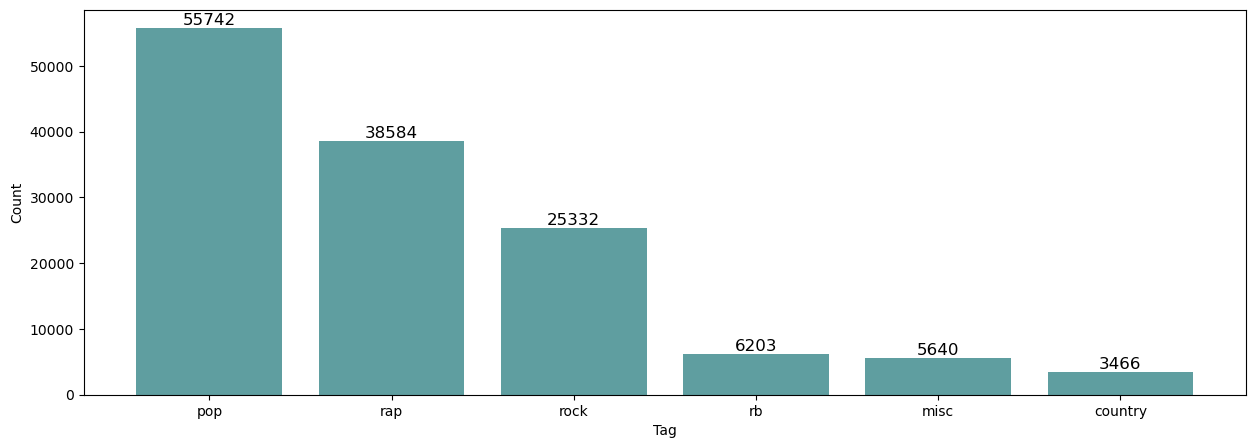

In [20]:
fig, ax = plt.subplots()
plot_bar_chart(ax, train, 'tag', 'Tag', annotate = True)

### `title`

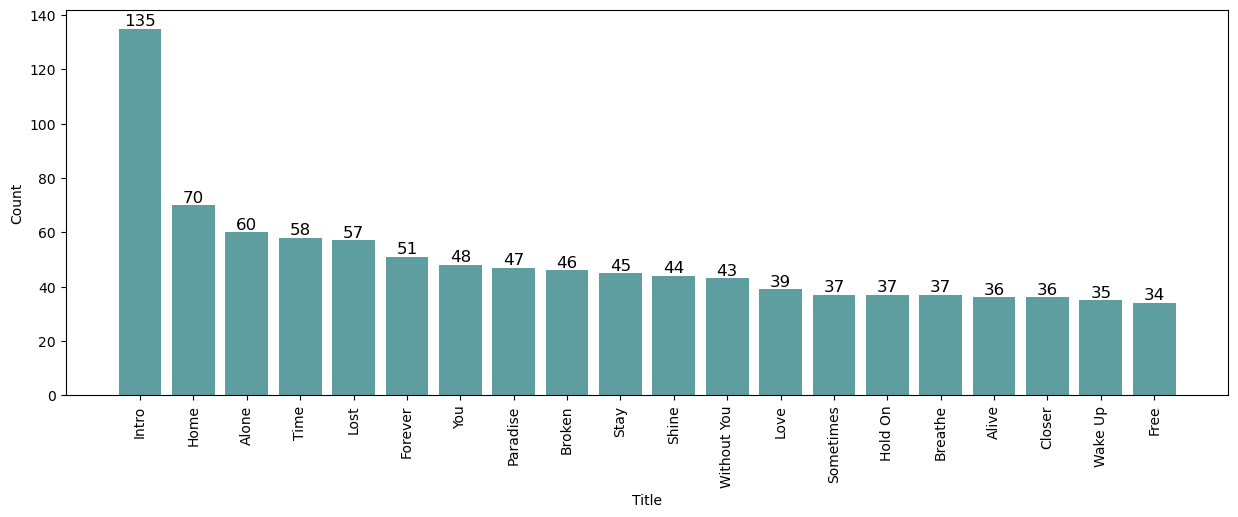

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'title', 'Title', annotate=True, top=20)

### `artist`

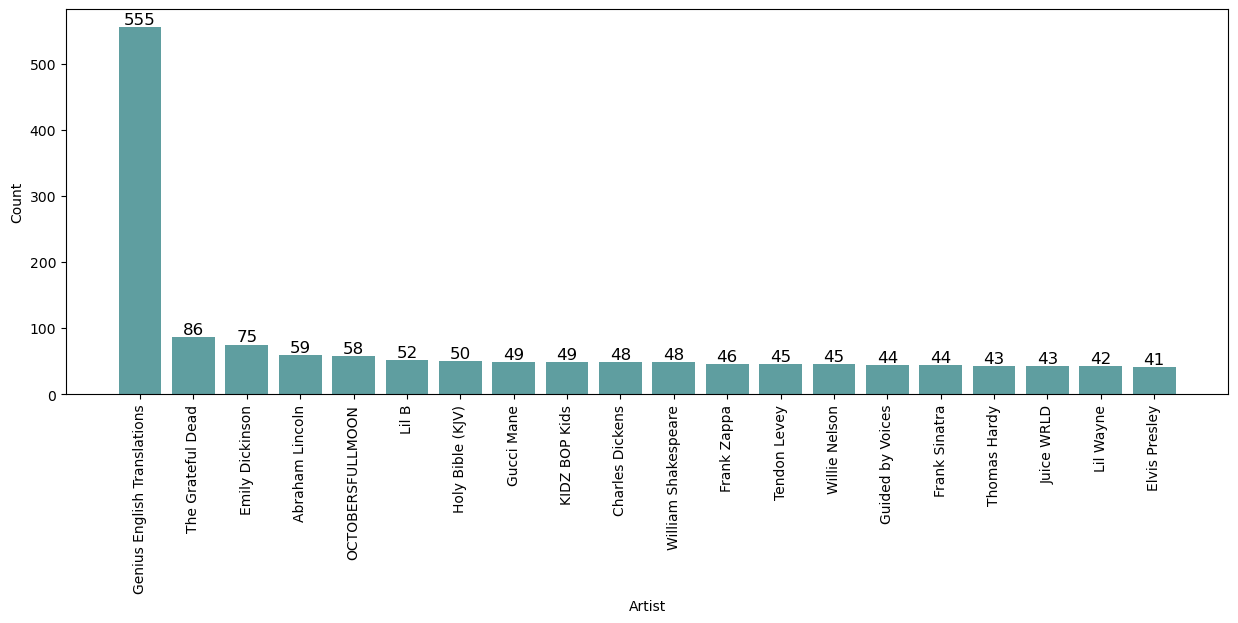

In [22]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'artist', 'Artist', annotate = True, top=20)

### `features`

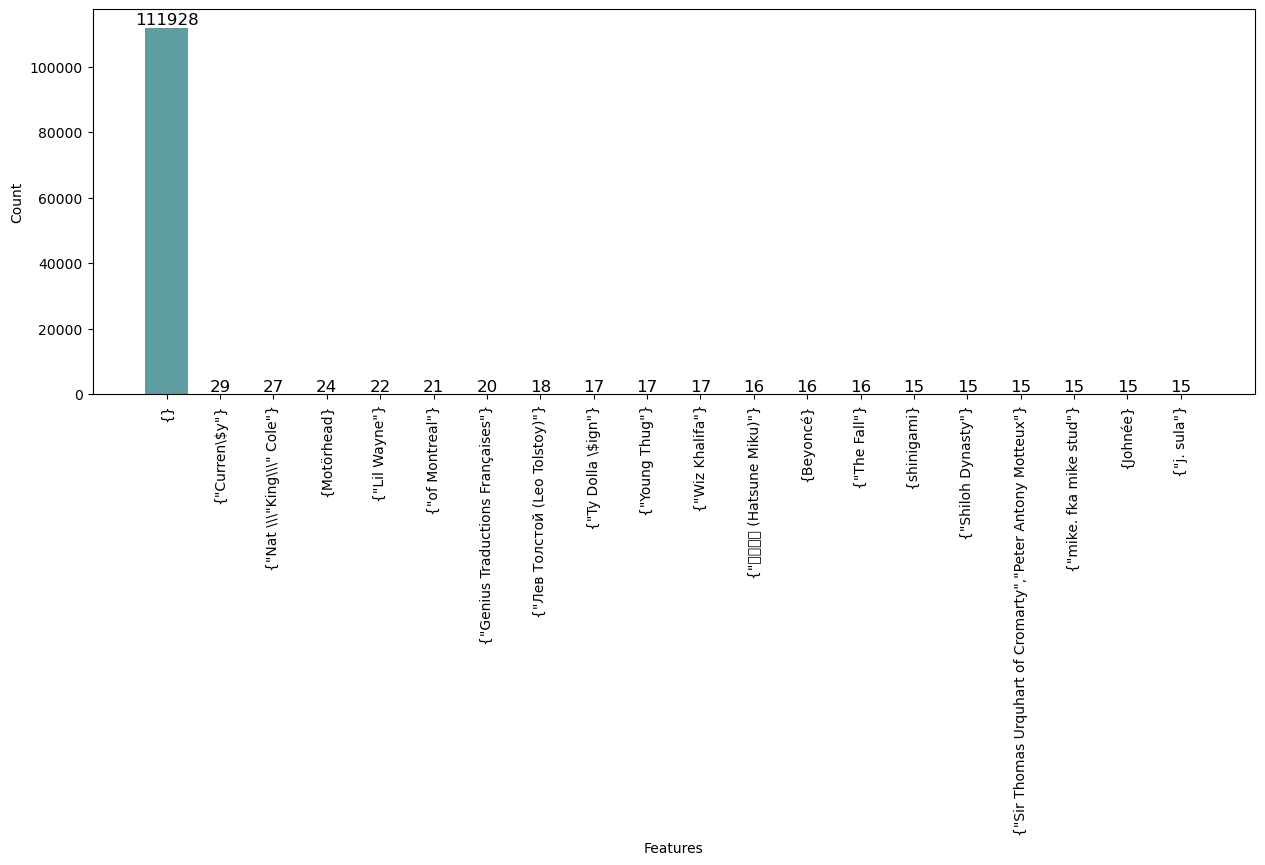

In [23]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'features', 'Features', annotate=True, top=20)

In [24]:
train[train['features'].str.contains('Genius')]['features'].value_counts()

{"Genius Traductions Françaises"}                                 20
{"Polskie tłumaczenia Genius"}                                    11
{"Genius Brasil Traduções"}                                        9
{"Tattoo Genius"}                                                  2
{Bilal,"Anna Wise",Thundercat,"Genius Traductions Françaises"}     1
{"MisUnderstood Genius","Vanesza JT"}                              1
{"Genius Farsi Translations (ترجمه‌ی فارسی)"}                      1
{"Education Genius"}                                               1
{"News Genius",Hypothes.is,IndieWebCamp}                           1
{Genius}                                                           1
{"Genius Internationals"}                                          1
{"Genius Türkçe Çeviri"}                                           1
{"Genius Lists"}                                                   1
{"John Hamilton","Sports Genius Basketball"}                       1
{"Rap Genius Editors"}            

### `lyrics`

### `year`

In [25]:
train[train['year'] > 2023]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7680512,STRAIGHT FIRE like the oven,rock,Whoops!,2024,52,"{Morgan,Roope,Barnes}",(Yeah LFG on that beat)\n(G-Gamzee Productions...


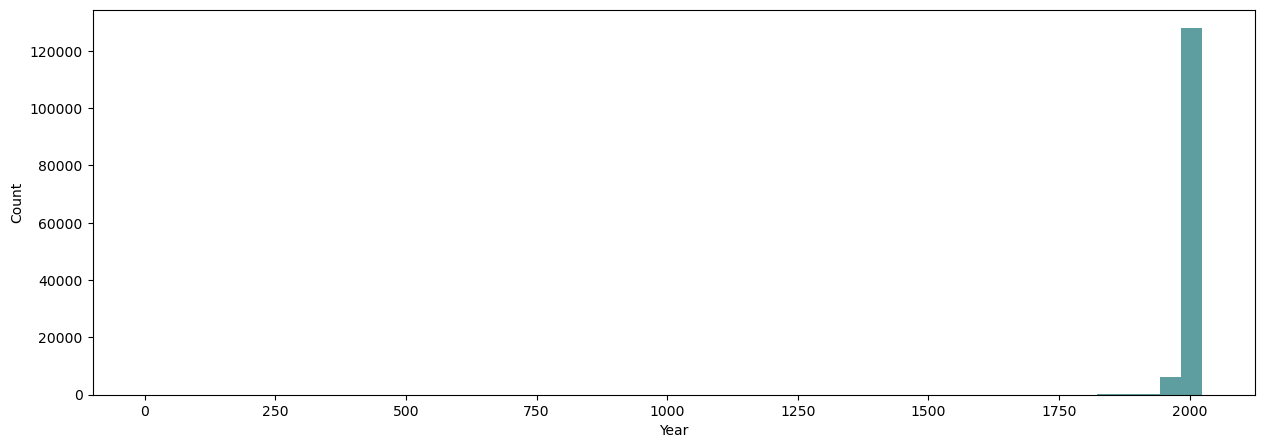

In [26]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'year', 'Year')

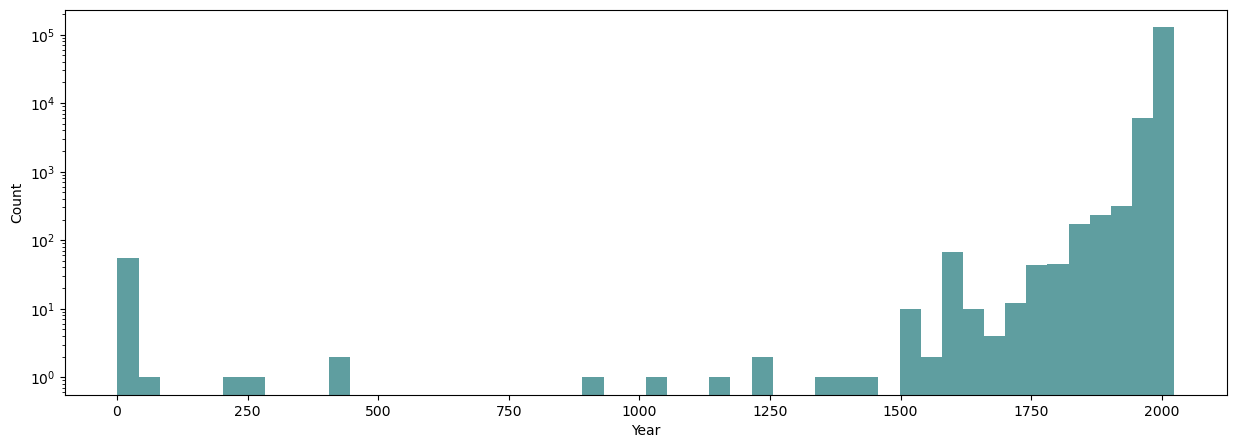

In [27]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'year', 'Year', log=True)

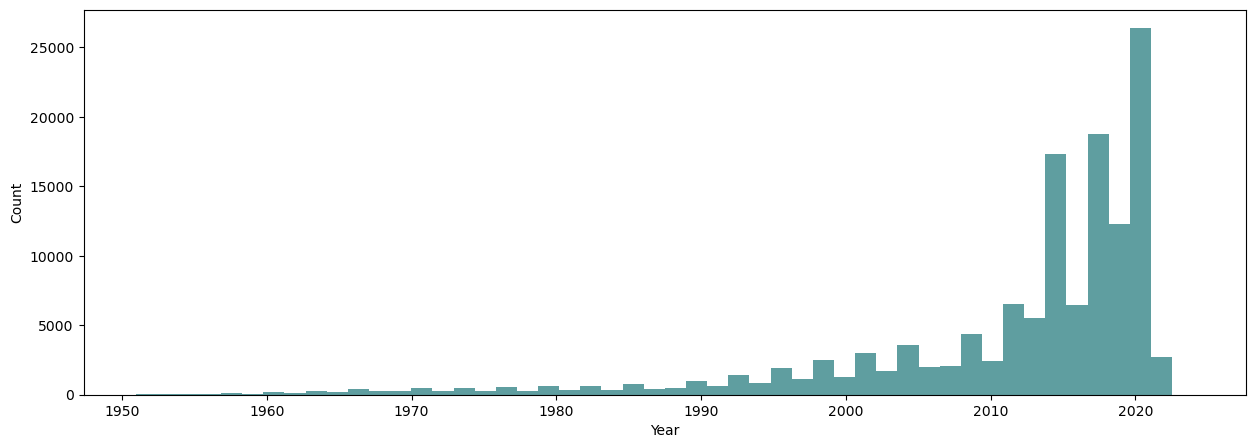

In [28]:
train_o1950 = train[train['year'] > 1950].copy()

fig, ax = plt.subplots()
plot_histogram(ax, train_o1950, 'year', 'Year')

### `views`

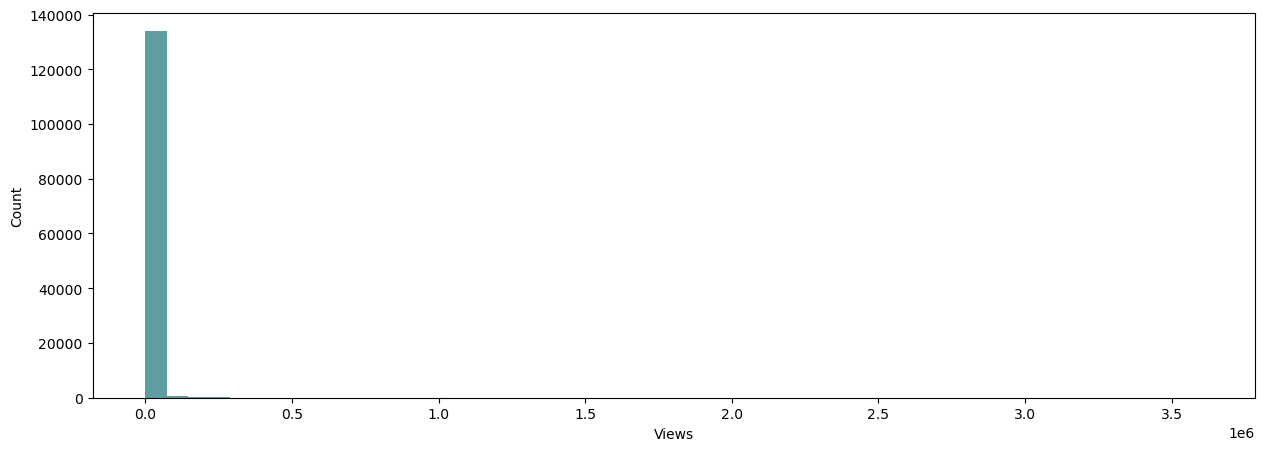

In [29]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'views', 'Views')

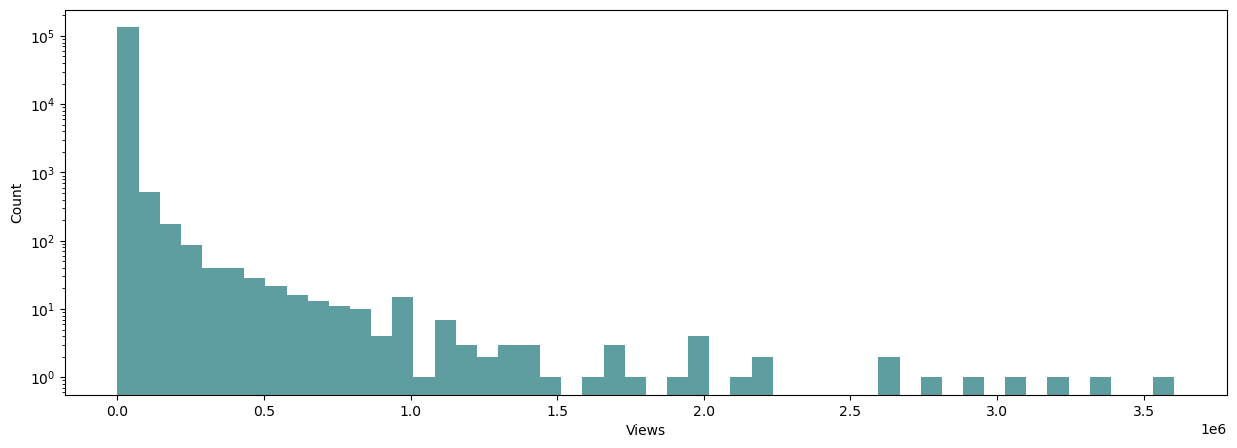

In [30]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'views', 'Views', log=True)

# Text Preprocessing

In [31]:
text_train = train[['title', 'artist', 'features', 'lyrics', 'tag']].copy()

## Data Transformation

In [32]:
for column in text_train.columns:
    text_train[column] = text_train[column].astype(str)
    text_train[column] = text_train[column].str.lower()

In [33]:
text_train

,title,artist,features,lyrics,tag
id,,,,,
535805,walk away,tony molina,{},when you said you loved me\ndid you mean it th...,rock
7519483,gotta make it kid naruto rap,reece lett,{sl!ck},kid naruto rap\n[hook]\neverybody wants you to...,rap
4892808,​this is what i asked for,elliot (dnk),{},[verse 1]\npeople tell me i've changed\ni find...,pop
1584150,stealing hearts,katie armiger,{},you've been warned about me\ndon't try to get ...,pop
7639050,get ready,john campbell munro,{},[verse 1]\ni can see the end is coming but i’v...,country
...,...,...,...,...,...
1702980,manhattan,tijuana sweetheart,{},if i knew when i was young that i'd be older\n...,pop
4802970,belly shit,lil gotit,"{""lil troup""}",[intro: lil gotit]\ncash\nwah-wah-wah\nwah-wah...,rap
403929,the four loves,heath mcnease,{},[verse 1]\ni was born inside a home\nthe young...,rock


## Inconsistencies

### `title`

#### Most common word: 'intro'

In [34]:
print('Titles that contain "intro":')
display(text_train[text_train['title'].str.contains('intro', na=False)]) #577
print(text_train[text_train['title'].str.contains('intro', na=False)]['tag'].value_counts())

print('\n\n')

print('Titles that are named "intro":')
display(text_train[text_train['title'] == 'intro']) #140
print(text_train[text_train['title'] == 'intro']['tag'].value_counts())

#rap

Titles that contain "intro":


,title,artist,features,lyrics,tag
id,,,,,
3556120,intro,jiggly caliente,{rupaul},"[intro]\nru, we're ready for you to make your ...",pop
6872886,intro,ytn music,"{""ytn doomsd.a.y."",mirod}",[hook: ytn doomsd.a.y.]\n\nroll up a blunt (ay...,rap
96497,intro,ferrow,{},[intro]\n\n[verse 1]\n\nyou are now rocking wi...,rap
2863030,introduction,frisco,{},"[intro]\n\n(we're going back to the lab, back ...",rap
3835648,intro,shaneskillz,{},[intro]\nyeah\nthat's fuckin' right cunts\nthi...,rap
...,...,...,...,...,...
698660,intro rn4l2,rondonumbanine,{},"[verse]\nin the cut, with the pole, pop out - ...",rap
2439623,introcation,nathan r. allen,{},my thoughts are base\nmy words are flawed\ni'm...,misc
1261053,introduction to the...,the (international) noise conspiracy,{},let's present to you this old friend of mine\n...,pop


rap        353
pop        104
misc        53
rb          39
rock        26
country      2
Name: tag, dtype: int64



Titles that are named "intro":


,title,artist,features,lyrics,tag
id,,,,,
3556120,intro,jiggly caliente,{rupaul},"[intro]\nru, we're ready for you to make your ...",pop
6872886,intro,ytn music,"{""ytn doomsd.a.y."",mirod}",[hook: ytn doomsd.a.y.]\n\nroll up a blunt (ay...,rap
96497,intro,ferrow,{},[intro]\n\n[verse 1]\n\nyou are now rocking wi...,rap
3835648,intro,shaneskillz,{},[intro]\nyeah\nthat's fuckin' right cunts\nthi...,rap
5115844,intro,sean kennedy,{},"yeah, no like, i just played it for my friends...",pop
...,...,...,...,...,...
104959,intro,n.e.r.d.,{},"[intro]\n""n...e...r...d...\nthis..is... *in......",rap
665829,intro,proph3cy,{},intro song:\n\nintro:\nhey\nhello this is the ...,rb
4656037,intro,mc hammer,"{""ben ross""}",[ben ross:]\nwell well\nonce again it's your a...,rap


rap        91
pop        24
rb          9
misc        9
rock        6
country     1
Name: tag, dtype: int64


#### Artists wrongly placed

In [35]:
text_train[text_train['title'].str.contains(' - ', na=False)] #2176

,title,artist,features,lyrics,tag
id,,,,,
2235574,good thing - skacoustic,reel big fish,{},i never felt too good but in this world who wo...,pop
1953055,i wish - live at the s.e.c.c.,babyshambles,{},i sit alone almost every night\ni watch those ...,pop
2068139,every morning song - demo,the avett brothers,{},hurt so bad\nyou don't come around here anymor...,pop
6815917,ferbinho - lionel english translation,genius english translations,{},[intro]\nsosick\nahn\n\n[verse 1]\ni'm in the ...,rap
5166437,make it happen live at mtv unplugged kaufman a...,mariah carey,{},[intro]\nand this next song is my next single\...,pop
...,...,...,...,...,...
2122577,its my party - re-recording,lesley gore,{},"it's my party, and i'll cry if i want to\ncry ...",pop
1939063,papa was a rollin stone - single version,the temptations,{},it was the third of september\nthat day i'll a...,pop
6363839,overrated - remix,gl0ck40,"{aaa,og7even}","[intro: mikey nolan]\nyeah, ayy\n\n[verse 1: m...",rap


##### "feat."

In [36]:
text_train[(text_train['title'].str.contains('feat.', na=False, regex=False))] #8921

,title,artist,features,lyrics,tag
id,,,,,
984084,international anthem feat. tha alkaholiks,dj honda,"{""​dj honda""}",featuring tha alkaholiks]\nintro:\nto japan th...,pop
6746220,educate feat. bam,drew aquino,{},"written by:\ndrew aquino, bam, & cj\n\n(chorus...",rap
5094355,rock and roll feat. jt,yuri runs,"{""jt (joel)""}","she's got that rock, that roll\nthat rock and ...",pop
6770837,plastic sky feat. bel florence,andrew lamping,"{""bel florence""}","plastic skies, all around me\nthis ain’t a lie...",pop
7366990,coogie - swipe feat. ourealgoat touch the sky...,genius english translations,{},[chorus]\ngimme the loot\nswiping fuck boys to...,rap
...,...,...,...,...,...
2201457,flyin so high feat. conn raney,aj rafael,{},"just, and i dont know if this is love, but im ...",pop
1269489,like this feat. sen,freekey zekey,{},"(feat. sen)\n\nuh-huh, it's ya boy\nfreekey ze...",pop
3619213,loves in the melody feat. caleb keolanui,kimi miner,"{""kimié miner"",""caleb keolanui""}",[verse 1 (kimié miner)]\ni know it's hard when...,pop


In [37]:
# title that contains "feat."
text_train[(text_train['title'].str.contains(r'\bfeat\.', na=False, regex=True))] #8865 

,title,artist,features,lyrics,tag
id,,,,,
984084,international anthem feat. tha alkaholiks,dj honda,"{""​dj honda""}",featuring tha alkaholiks]\nintro:\nto japan th...,pop
6746220,educate feat. bam,drew aquino,{},"written by:\ndrew aquino, bam, & cj\n\n(chorus...",rap
5094355,rock and roll feat. jt,yuri runs,"{""jt (joel)""}","she's got that rock, that roll\nthat rock and ...",pop
6770837,plastic sky feat. bel florence,andrew lamping,"{""bel florence""}","plastic skies, all around me\nthis ain’t a lie...",pop
7366990,coogie - swipe feat. ourealgoat touch the sky...,genius english translations,{},[chorus]\ngimme the loot\nswiping fuck boys to...,rap
...,...,...,...,...,...
2201457,flyin so high feat. conn raney,aj rafael,{},"just, and i dont know if this is love, but im ...",pop
1269489,like this feat. sen,freekey zekey,{},"(feat. sen)\n\nuh-huh, it's ya boy\nfreekey ze...",pop
3619213,loves in the melody feat. caleb keolanui,kimi miner,"{""kimié miner"",""caleb keolanui""}",[verse 1 (kimié miner)]\ni know it's hard when...,pop


In [38]:
text_train[
    (text_train['title'].str.contains('feat.', na=False, regex=False)) #8921
    &
    ~(text_train['title'].str.contains(' feat.', na=False, regex=False)) #8850
    ] #71

,title,artist,features,lyrics,tag
id,,,,,
7801243,feat. cryptive,cathcart,{},"[verse 1: cathcart]\ncoming from the\nbunker, ...",rap
1806682,wit yo bad selffeat. mad skillz,timbaland & magoo,{},timbaland & magoo\nmiscellaneous\nwit' yo' bad...,pop
1253500,this goes outfeat. big duke and joe blak,jagged edge,{},"jagged edge\nmiscellaneous\nthis goes out""(fea...",pop
7510059,lifelinefeat.sinderella mann,spinderella mann,"{""sinderella mann""}",intro\nits about time i escape this place call...,rock


In [39]:
text_train[
    (text_train['title'].str.contains('feat.', na=False, regex=False)) #8921
    &
    ~(text_train['title'].str.contains(r'\bfeat\.', na=False, regex=True)) #8865
    ] #56

,title,artist,features,lyrics,tag
id,,,,,
1806682,wit yo bad selffeat. mad skillz,timbaland & magoo,{},timbaland & magoo\nmiscellaneous\nwit' yo' bad...,pop
1253500,this goes outfeat. big duke and joe blak,jagged edge,{},"jagged edge\nmiscellaneous\nthis goes out""(fea...",pop
7510059,lifelinefeat.sinderella mann,spinderella mann,"{""sinderella mann""}",intro\nits about time i escape this place call...,rock


In [40]:
text_train[
    (
    (text_train['title'].str.contains('feat.', na=False, regex=False)) #8921
    &
    ~(text_train['title'].str.contains(' feat.', na=False, regex=False)) #8850
    ) #71
    &
    ~(
    (text_train['title'].str.contains('feat.', na=False, regex=False)) #8921
    &
    ~(text_train['title'].str.contains(r'\bfeat\.', na=False, regex=True)) #8865
    ) #56
    ] #15

,title,artist,features,lyrics,tag
id,,,,,
7801243,feat. cryptive,cathcart,{},"[verse 1: cathcart]\ncoming from the\nbunker, ...",rap


##### "feat"

In [41]:
text_train[(text_train['title'].str.contains('feat ', na=False, regex=False))] #380

,title,artist,features,lyrics,tag
id,,,,,
6020411,viral feat solesion,dirstymc,{solesion},(chorus) (solesion)\nyea i waited for this tim...,rap
7124934,falling petals feat joseline tristani,noah kammer,"{""joseline tristani""}",from the moment that we met\ni can't get you o...,pop
3404941,charlie puth feat 2pac - see you again remix,christian klaus,{},"(intro): tupac\nlet us pray, heavenly father\n...",rap
4896356,210 feat tayler,mav,{tayler},[hook:]\nblowing smoke\ni got demons and they'...,rap
2336934,over.feat def 5 star,deiajay hayes,"{""def 5 star""}","intro : yes,it's boy def man south,side,wild h...",rap
7497852,gotta go feat ab3l x,pxpercutt,"{""pxpercutt [pxperbeats]""}",pxpercutt\ngotta go (feat. ab3l x)\nalive ep\n...,rap
3430379,tonight feat amy nøhr,cornelius,"{""amy nøhr""}","(verse)\namy nøhr:\nhey child, i will let you ...",pop
3586737,new flava feat duck or die westbury jamezbarzi...,k.a.y.o da konspiracy,"{""duck or die"",""westbury jamez""}","(k.a.y.o)(adlib) (hol'up,) killed half of crak...",rap
3776137,leaving you feat s.a.m,jayd'n dominique,"{""jayd\\'n dominique""}","chorus:\n\nyah, i'm leaving you\ni'm leaving y...",pop


In [42]:
# " feat "
text_train[text_train['title'].str.contains(r'\bfeat ', na=False, regex=True)] #336

,title,artist,features,lyrics,tag
id,,,,,
6020411,viral feat solesion,dirstymc,{solesion},(chorus) (solesion)\nyea i waited for this tim...,rap
7124934,falling petals feat joseline tristani,noah kammer,"{""joseline tristani""}",from the moment that we met\ni can't get you o...,pop
3404941,charlie puth feat 2pac - see you again remix,christian klaus,{},"(intro): tupac\nlet us pray, heavenly father\n...",rap
4896356,210 feat tayler,mav,{tayler},[hook:]\nblowing smoke\ni got demons and they'...,rap
2336934,over.feat def 5 star,deiajay hayes,"{""def 5 star""}","intro : yes,it's boy def man south,side,wild h...",rap
7497852,gotta go feat ab3l x,pxpercutt,"{""pxpercutt [pxperbeats]""}",pxpercutt\ngotta go (feat. ab3l x)\nalive ep\n...,rap
3430379,tonight feat amy nøhr,cornelius,"{""amy nøhr""}","(verse)\namy nøhr:\nhey child, i will let you ...",pop
3586737,new flava feat duck or die westbury jamezbarzi...,k.a.y.o da konspiracy,"{""duck or die"",""westbury jamez""}","(k.a.y.o)(adlib) (hol'up,) killed half of crak...",rap
3776137,leaving you feat s.a.m,jayd'n dominique,"{""jayd\\'n dominique""}","chorus:\n\nyah, i'm leaving you\ni'm leaving y...",pop


In [43]:
text_train[
    (text_train['title'].str.contains('feat ', na=False, regex=False)) #380
    &
    # ~(text_train['title'].str.contains(r'\bfeat ', na=False, regex=True)) #336
    # &
    ~(text_train['title'].str.contains('defeat', na=False, regex=False))
    ] #341

,title,artist,features,lyrics,tag
id,,,,,
6020411,viral feat solesion,dirstymc,{solesion},(chorus) (solesion)\nyea i waited for this tim...,rap
7124934,falling petals feat joseline tristani,noah kammer,"{""joseline tristani""}",from the moment that we met\ni can't get you o...,pop
3404941,charlie puth feat 2pac - see you again remix,christian klaus,{},"(intro): tupac\nlet us pray, heavenly father\n...",rap
4896356,210 feat tayler,mav,{tayler},[hook:]\nblowing smoke\ni got demons and they'...,rap
2336934,over.feat def 5 star,deiajay hayes,"{""def 5 star""}","intro : yes,it's boy def man south,side,wild h...",rap
7497852,gotta go feat ab3l x,pxpercutt,"{""pxpercutt [pxperbeats]""}",pxpercutt\ngotta go (feat. ab3l x)\nalive ep\n...,rap
3430379,tonight feat amy nøhr,cornelius,"{""amy nøhr""}","(verse)\namy nøhr:\nhey child, i will let you ...",pop
3586737,new flava feat duck or die westbury jamezbarzi...,k.a.y.o da konspiracy,"{""duck or die"",""westbury jamez""}","(k.a.y.o)(adlib) (hol'up,) killed half of crak...",rap
3776137,leaving you feat s.a.m,jayd'n dominique,"{""jayd\\'n dominique""}","chorus:\n\nyah, i'm leaving you\ni'm leaving y...",pop


In [44]:
text_train[text_train['title'].str.contains(r'\bfeat \b', na=False, regex=True)] #332

,title,artist,features,lyrics,tag
id,,,,,
6020411,viral feat solesion,dirstymc,{solesion},(chorus) (solesion)\nyea i waited for this tim...,rap
7124934,falling petals feat joseline tristani,noah kammer,"{""joseline tristani""}",from the moment that we met\ni can't get you o...,pop
3404941,charlie puth feat 2pac - see you again remix,christian klaus,{},"(intro): tupac\nlet us pray, heavenly father\n...",rap
4896356,210 feat tayler,mav,{tayler},[hook:]\nblowing smoke\ni got demons and they'...,rap
2336934,over.feat def 5 star,deiajay hayes,"{""def 5 star""}","intro : yes,it's boy def man south,side,wild h...",rap
7497852,gotta go feat ab3l x,pxpercutt,"{""pxpercutt [pxperbeats]""}",pxpercutt\ngotta go (feat. ab3l x)\nalive ep\n...,rap
3430379,tonight feat amy nøhr,cornelius,"{""amy nøhr""}","(verse)\namy nøhr:\nhey child, i will let you ...",pop
3586737,new flava feat duck or die westbury jamezbarzi...,k.a.y.o da konspiracy,"{""duck or die"",""westbury jamez""}","(k.a.y.o)(adlib) (hol'up,) killed half of crak...",rap
3776137,leaving you feat s.a.m,jayd'n dominique,"{""jayd\\'n dominique""}","chorus:\n\nyah, i'm leaving you\ni'm leaving y...",pop


In [45]:
text_train[(text_train['title'].str.contains(' feat ', na=False, regex=False))] #329

,title,artist,features,lyrics,tag
id,,,,,
6020411,viral feat solesion,dirstymc,{solesion},(chorus) (solesion)\nyea i waited for this tim...,rap
7124934,falling petals feat joseline tristani,noah kammer,"{""joseline tristani""}",from the moment that we met\ni can't get you o...,pop
3404941,charlie puth feat 2pac - see you again remix,christian klaus,{},"(intro): tupac\nlet us pray, heavenly father\n...",rap
4896356,210 feat tayler,mav,{tayler},[hook:]\nblowing smoke\ni got demons and they'...,rap
7497852,gotta go feat ab3l x,pxpercutt,"{""pxpercutt [pxperbeats]""}",pxpercutt\ngotta go (feat. ab3l x)\nalive ep\n...,rap
3430379,tonight feat amy nøhr,cornelius,"{""amy nøhr""}","(verse)\namy nøhr:\nhey child, i will let you ...",pop
3586737,new flava feat duck or die westbury jamezbarzi...,k.a.y.o da konspiracy,"{""duck or die"",""westbury jamez""}","(k.a.y.o)(adlib) (hol'up,) killed half of crak...",rap
3776137,leaving you feat s.a.m,jayd'n dominique,"{""jayd\\'n dominique""}","chorus:\n\nyah, i'm leaving you\ni'm leaving y...",pop
6532499,cardi b - wap remix page kennedy feat wolf god,page kennedy,"{""wolf god""}",[intro]\nchores in the house x7\n\ncertified d...,rap


In [46]:
text_train[
    (text_train['title'].str.contains(r'\bfeat ', na=False, regex=True)) #336
    &
    ~(text_train['title'].str.contains(r'\bfeat \b', na=False, regex=True)) #332
    ] #4

,title,artist,features,lyrics,tag
id,,,,,


In [47]:
text_train[
    (text_train['title'].str.contains(r'\bfeat ', na=False, regex=True)) #336
    &
    ~((text_train['title'].str.contains(' feat ', na=False, regex=False))) #329
    ] #7

,title,artist,features,lyrics,tag
id,,,,,
2336934,over.feat def 5 star,deiajay hayes,"{""def 5 star""}","intro : yes,it's boy def man south,side,wild h...",rap


In [48]:
text_train[text_train['title'].str.contains(r'\bfeat\b', na=False, regex=True)]

,title,artist,features,lyrics,tag
id,,,,,
984084,international anthem feat. tha alkaholiks,dj honda,"{""​dj honda""}",featuring tha alkaholiks]\nintro:\nto japan th...,pop
6746220,educate feat. bam,drew aquino,{},"written by:\ndrew aquino, bam, & cj\n\n(chorus...",rap
5094355,rock and roll feat. jt,yuri runs,"{""jt (joel)""}","she's got that rock, that roll\nthat rock and ...",pop
6770837,plastic sky feat. bel florence,andrew lamping,"{""bel florence""}","plastic skies, all around me\nthis ain’t a lie...",pop
7366990,coogie - swipe feat. ourealgoat touch the sky...,genius english translations,{},[chorus]\ngimme the loot\nswiping fuck boys to...,rap
...,...,...,...,...,...
2201457,flyin so high feat. conn raney,aj rafael,{},"just, and i dont know if this is love, but im ...",pop
1269489,like this feat. sen,freekey zekey,{},"(feat. sen)\n\nuh-huh, it's ya boy\nfreekey ze...",pop
3619213,loves in the melody feat. caleb keolanui,kimi miner,"{""kimié miner"",""caleb keolanui""}",[verse 1 (kimié miner)]\ni know it's hard when...,pop


##### "featuring"

In [49]:
text_train[(text_train['title'].str.contains('featuring', na=False))] #127

,title,artist,features,lyrics,tag
id,,,,,
6526247,chainsaw featuring.mxrte lil lightblue,deathkingjr,"{""lil lightblue"",mxrte}",[verse 1: deathkingjr]\nshe wanna sucking my d...,rap
6693087,let it go featuring nas,okaeiknoe,{},okay i know that it gotta be the bread in the ...,rap
7360739,copacetic featuring phil j.,czar josh,"{""phil j.""}",hook:\nwoke up thinking bout you\nthanking god...,rap
4863242,sriracha featuring pepper solana,ruby black,"{""pepper solana""}",[intro: pepper solana]\nbuh-buh-buh baby!\n\n[...,rb
7362305,money honey featuring. ascendence,sus,{ascendence},"ascend, its $u$ and killcore, we've been feeli...",pop
6729949,army of me featuring skunk anansie,bjrk,"{björk,""skunk anansie""}",[verse 1]\nstand up\nyou've got to manage\ni w...,rock
5139045,carlisle featuring johnyce,commi$$ion (rap),"{""commi\\$\\$ion (rap)"",johnyce}",[verse 1: commission]\n\nit’s been a while\nei...,rap
5848737,crack featuring pete the fly,paul mooney,{},"one thing i do notice here, then niggers and t...",misc
6726040,featuring mark hoppus,hot mulligan,{},[verse 1]\ni kinda miss you\nback in high scho...,rock


In [50]:
text_train[(text_train['title'].str.contains(' featuring ', na=False))] #108

,title,artist,features,lyrics,tag
id,,,,,
6693087,let it go featuring nas,okaeiknoe,{},okay i know that it gotta be the bread in the ...,rap
7360739,copacetic featuring phil j.,czar josh,"{""phil j.""}",hook:\nwoke up thinking bout you\nthanking god...,rap
4863242,sriracha featuring pepper solana,ruby black,"{""pepper solana""}",[intro: pepper solana]\nbuh-buh-buh baby!\n\n[...,rb
6729949,army of me featuring skunk anansie,bjrk,"{björk,""skunk anansie""}",[verse 1]\nstand up\nyou've got to manage\ni w...,rock
5139045,carlisle featuring johnyce,commi$$ion (rap),"{""commi\\$\\$ion (rap)"",johnyce}",[verse 1: commission]\n\nit’s been a while\nei...,rap
5848737,crack featuring pete the fly,paul mooney,{},"one thing i do notice here, then niggers and t...",misc


In [51]:
text_train[
    (text_train['title'].str.contains('featuring', na=False)) #127
    &
    ~(text_train['title'].str.contains(' featuring ', na=False)) #108
    ] 

,title,artist,features,lyrics,tag
id,,,,,
6526247,chainsaw featuring.mxrte lil lightblue,deathkingjr,"{""lil lightblue"",mxrte}",[verse 1: deathkingjr]\nshe wanna sucking my d...,rap
7362305,money honey featuring. ascendence,sus,{ascendence},"ascend, its $u$ and killcore, we've been feeli...",pop
6726040,featuring mark hoppus,hot mulligan,{},[verse 1]\ni kinda miss you\nback in high scho...,rock


In [52]:
text_train[
    (text_train['title'].str.contains('featuring', na=False)) #127
    &
    ~(text_train['title'].str.startswith('featuring'))
    ] #118

,title,artist,features,lyrics,tag
id,,,,,
6526247,chainsaw featuring.mxrte lil lightblue,deathkingjr,"{""lil lightblue"",mxrte}",[verse 1: deathkingjr]\nshe wanna sucking my d...,rap
6693087,let it go featuring nas,okaeiknoe,{},okay i know that it gotta be the bread in the ...,rap
7360739,copacetic featuring phil j.,czar josh,"{""phil j.""}",hook:\nwoke up thinking bout you\nthanking god...,rap
4863242,sriracha featuring pepper solana,ruby black,"{""pepper solana""}",[intro: pepper solana]\nbuh-buh-buh baby!\n\n[...,rb
7362305,money honey featuring. ascendence,sus,{ascendence},"ascend, its $u$ and killcore, we've been feeli...",pop
6729949,army of me featuring skunk anansie,bjrk,"{björk,""skunk anansie""}",[verse 1]\nstand up\nyou've got to manage\ni w...,rock
5139045,carlisle featuring johnyce,commi$$ion (rap),"{""commi\\$\\$ion (rap)"",johnyce}",[verse 1: commission]\n\nit’s been a while\nei...,rap
5848737,crack featuring pete the fly,paul mooney,{},"one thing i do notice here, then niggers and t...",misc


##### "ft."

In [53]:
text_train[(text_train['title'].str.contains('ft.', na=False, regex=False))] #4040

,title,artist,features,lyrics,tag
id,,,,,
7550031,sogumm 소금 dress - honey bee ft. penomeco 페노메코 ...,genius english translations,{},[intro: sogumm]\nbeautiful\ni never seen any b...,pop
3799384,cant lose ft. twanee,young buck,{twanée},[verse 1: young buck]\nso i got to keep rollin...,rap
2921833,under pressure sweet 16 ft. 2pac,jcbz,{2pac},"fuck a bitch i ain't celibate, try to get rich...",rap
7425788,trade l - tango ft. camo ourealgoat english t...,genius english translations,{},"[intro]\neh, woah, woah\nyeah, woah, woah\neh,...",rap
7310637,peace of mind ft. natalic,ganther,{natalic},[intro]\nlala lalaaaa haana\nsi budubadadadala...,pop
...,...,...,...,...,...
3364692,lights ft. feather,aviators,{},i've been watching you stumble through the dar...,pop
735820,road to seoul ft. sam ock,gowe,"{""sam ock""}",[verse 1: gowe]\nsometimes i wonder whats the ...,rap
5104611,wind ft. acuna raul,j.dn (rap),{},(shit...\neverybody around me...\nmaking thing...,rap


##### "ft"

In [54]:
text_train[(text_train['title'].str.contains(r'\bft ', na=False, regex=True))] #575

,title,artist,features,lyrics,tag
id,,,,,
6128482,action freestyle ft t$upreme,e-mag,"{""t\\$upreme""}",emag on the beat\n\nthat boy is a bitch he is ...,rap
3326822,lagos girl-ft daddy 99,rhae ft daddy 99,{},intro\n[daddy 99]\nyeah yeah\nits 99 yeah..\n\...,pop
3250833,dark space ft gramso,skid adams,{gramso},[chorus: skid adams]\ni said a lot being quiet...,rap
6308815,melt ft chris conley,dad feels,"{""chris conley""}","[intro: chris conley]\nhah!\ncome on\nalright,...",pop
7874900,let go ft lilly carron,cellarr,"{""lilly carron""}",my shoe don’t fit right\nbut time will tell\na...,pop
5641412,6 ft barrier,thigh master,{},a 6 foot barrier was set\na 6 foot barrier in ...,pop
2954480,all i need ft . 21 quest matt cronin amanda ...,valre,"{""21 quest"",""matt cronin"",valère,""amanda nicole""}",( i'll be down for you )\n\n(valère)\n\nshe sa...,rb
5512862,supersonic ft vlone karii,marlii kingdom,"{""vlone karii""}",[hook: marlii]\n\ngotta be rolling - stoners (...,rap
5071728,keep pushing ft style,mphemba prince,{},"bluuu\n\nthis is my time my life ,no time to w...",rap


##### Combining

In [55]:
text_train[text_train['title'].str.contains(r'\bfeat\b|\bfeat\.|\bft\b|\bft\.|\bfeaturing', na=False, regex=True)] #13930

,title,artist,features,lyrics,tag
id,,,,,
984084,international anthem feat. tha alkaholiks,dj honda,"{""​dj honda""}",featuring tha alkaholiks]\nintro:\nto japan th...,pop
7550031,sogumm 소금 dress - honey bee ft. penomeco 페노메코 ...,genius english translations,{},[intro: sogumm]\nbeautiful\ni never seen any b...,pop
6746220,educate feat. bam,drew aquino,{},"written by:\ndrew aquino, bam, & cj\n\n(chorus...",rap
5094355,rock and roll feat. jt,yuri runs,"{""jt (joel)""}","she's got that rock, that roll\nthat rock and ...",pop
6770837,plastic sky feat. bel florence,andrew lamping,"{""bel florence""}","plastic skies, all around me\nthis ain’t a lie...",pop
...,...,...,...,...,...
1269489,like this feat. sen,freekey zekey,{},"(feat. sen)\n\nuh-huh, it's ya boy\nfreekey ze...",pop
3619213,loves in the melody feat. caleb keolanui,kimi miner,"{""kimié miner"",""caleb keolanui""}",[verse 1 (kimié miner)]\ni know it's hard when...,pop
6726040,featuring mark hoppus,hot mulligan,{},[verse 1]\ni kinda miss you\nback in high scho...,rock


### `artist`

In [56]:
text_train[text_train['artist'].str.contains('(', regex=False)]

,title,artist,features,lyrics,tag
id,,,,,
4892808,​this is what i asked for,elliot (dnk),{},[verse 1]\npeople tell me i've changed\ni find...,pop
1007749,enjoy the silence,swift (band),{},words like violence break the silence\nand com...,pop
1986785,tonight,lune (sve),{},"""eris flies tonight""\nmy head against this con...",pop
4776586,paper thin,j.v. (brasil),{},if you say ‘leave’\nknow i’ll stay anyways\nwo...,pop
6606214,stars align,r3hab & (jolin tsai),"{""r3hab & 蔡依林 (jolin tsai)""}",[verse 1]\ncan i go back to the days that i ha...,pop
...,...,...,...,...,...
3922881,honeysea ii,.hans. (nz),{ivoris},"[intro: hans.]\nlook, yeah\n\n[chorus: ivoris]...",rap
1106528,utopia,spock (rapper),{},there was a time\nwhen the seas were yet to be...,pop
401386,shalaams,isah (us),{},schalaams\nschalaams on my phone i just de p!\...,rap


In [57]:
text_train[text_train['artist'] == 'genius english translations'] #10935

,title,artist,features,lyrics,tag
id,,,,,
6815917,ferbinho - lionel english translation,genius english translations,{},[intro]\nsosick\nahn\n\n[verse 1]\ni'm in the ...,rap
7634567,def. - want u english translation,genius english translations,{},[intro]\nlove you\ni just need you\nand i want...,rb
7550031,sogumm 소금 dress - honey bee ft. penomeco 페노메코 ...,genius english translations,{},[intro: sogumm]\nbeautiful\ni never seen any b...,pop
7749379,ricky martin - náufrago english translation,genius english translations,{},"[intro]\ni have a story for you, ha!\n\n[verse...",pop
7366990,coogie - swipe feat. ourealgoat touch the sky...,genius english translations,{},[chorus]\ngimme the loot\nswiping fuck boys to...,rap
...,...,...,...,...,...
5615334,bích phương ft traitimtrongvang - ​em bỏ hút t...,genius english translations,{},[traitimtrongvang]\nhow have you been?\nyou lo...,pop
5691738,motel - ya no quiero mentirte english translation,genius english translations,{},[verse 1]\neverything changed\nwhen your voice...,pop
5755341,renjun chenle - 新的开始 a new beginning english ...,genius english translations,{},when i close my eyes\nit's almost like i could...,pop


In [58]:
text_train[
    (text_train['artist'] == 'genius english translations') #10935
    &
    (text_train['title'].str.contains('english translation', na=False)) 
    &
    ~(text_train['title'].str.endswith('english translation', na=False))
    &
    ~(text_train['title'].str.endswith('english translations', na=False))
    ]

,title,artist,features,lyrics,tag
id,,,,,


In [59]:
text_train[text_train['artist'] == 'genius english translations']['tag'].value_counts()

pop     309
rap     163
rock     52
rb       30
misc      1
Name: tag, dtype: int64

In [60]:
text_train[text_train['artist'].str.contains(r'\bgenius', regex=True)]

,title,artist,features,lyrics,tag
id,,,,,
6815917,ferbinho - lionel english translation,genius english translations,{},[intro]\nsosick\nahn\n\n[verse 1]\ni'm in the ...,rap
7634567,def. - want u english translation,genius english translations,{},[intro]\nlove you\ni just need you\nand i want...,rb
7550031,sogumm 소금 dress - honey bee ft. penomeco 페노메코 ...,genius english translations,{},[intro: sogumm]\nbeautiful\ni never seen any b...,pop
7749379,ricky martin - náufrago english translation,genius english translations,{},"[intro]\ni have a story for you, ha!\n\n[verse...",pop
3506177,drake - legend tradução em português,genius brasil tradues,"{""genius brasil traduções""}",[produced by partynextdoor]\n\n[pre-chorus]\nw...,rap
...,...,...,...,...,...
5691738,motel - ya no quiero mentirte english translation,genius english translations,{},[verse 1]\neverything changed\nwhen your voice...,pop
5755341,renjun chenle - 新的开始 a new beginning english ...,genius english translations,{},when i close my eyes\nit's almost like i could...,pop
7287858,seventeen - 그리워하는 것까지 i can’t run away english...,genius english translations,{},"[intro: s.coups]\ni won't run away, yeah\ni wo...",pop


In [61]:
text_train[text_train['artist'].str.contains('genius')]['artist'].value_counts()

genius english translations       555
genius traductions franaises       21
genius romanizations               13
genius users                       12
polskie tumaczenia genius          11
                                 ... 
yung genius                         1
metal genius                        1
genius nederlandse vertalingen      1
noble da genius                     1
stupid genius                       1
Name: artist, Length: 64, dtype: int64

### `features`

In [62]:
def sub_remove(text):
    x = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rtb|http.+?", "", text)
    return(x)

In [63]:
def transform_column_value(text):
    text = text.replace(' /', ',')
    text = text.replace('\\', '')
    matches = re.findall(r'"(.*?)"|(\w+)', text)
    result_list = [match[0] if match[0] else match[1] for match in matches]
    return result_list

In [64]:
text_train[text_train['features']]

KeyError: 'None of [Index([\'{}\', \'{sl!ck}\', \'{}\', \'{}\', \'{}\', \'{}\', \'{}\', \'{"corey j."}\', \'{}\',\n       \'{}\',\n       ...\n       \'{}\', \'{}\', \'{}\', \'{}\', \'{}\', \'{}\', \'{"lil troup"}\', \'{}\', \'{}\', \'{}\'],\n      dtype=\'object\', length=134967)] are in the [columns]'

In [ ]:
text_train_copy = text_train.copy()
text_train_copy['features'] = text_train_copy['features'].apply(transform_column_value)

In [ ]:
text_train_copy[text_train_copy['lyrics'].str.contains('https')]

,title,artist,features,lyrics,tag
id,,,,,
5002342,movin on,great white,[],"came to the city, to find my way\nthere's a po...",pop
4689086,dance floor,jimi hunydread,[adachie],track:dance floor\nartists: jimi hunydread ft ...,pop
655880,honest feedback,davegood,[],hey im working on my mixtape at the moment and...,rap
6274349,the frozen lake of the ice fray 1st draft,frostfire_voidseeker,[],"(the lyrics are not ready yet, but follow if y...",pop
6205059,shibabrata bhaumik explains why payq be indias...,shibabrata bhaumik,[],shibabrata bhaumik is an indian entrepreneur w...,misc
...,...,...,...,...,...
2460126,live kratom plants for sale,mitragyna speciosa,[],"if you really want to grow kratom plants, you ...",misc
7493355,rent boat in miami,rent boat in miami,[],"rent boat in miami\n927 lincoln rd suite 100, ...",misc
6720773,what are the benefits of buying youtube likes,smoagency,[],you can become your youtube video likes with o...,misc


In [ ]:
text_train_copy

,title,artist,features,lyrics,tag
id,,,,,
2135,bridge,jean grae,[],[hook - mela machinko]\nsee i can be the bridg...,rap
4127352,pain away,drew.,[],{hook}\n\n(look)\ntake the pain away\ntake the...,rap
3840789,tear us apart,kitten,[],in the quiet\nof lonely places\nmy love will t...,pop
1858665,california dreamin’,diana krall,[],[verse 1]\nall the leaves are brown and the sk...,pop
7211088,nightmares,earl stan,[],lonely in the night with my nightmares\nold bl...,rap
...,...,...,...,...,...
1645041,like a sad song,john denver,[],usually in the morning\ni'm filled with sweet ...,pop
348976,finding riley,pseudoubt,[],[verse 1: artifex]\nhence forth a new force of...,rap
6923283,thought of losing her,twing,[],[verse]\ngold\nyou stood there\nshining like t...,pop


In [ ]:
text_train_copy_copy = text_train.copy()
text_train_copy_copy['features'] = text_train_copy_copy['features'].apply(transform_column_value)
text_train_copy_copy['title'] = text_train_copy_copy['title'].apply(sub_remove)

In [105]:
text_train_copy_copy[text_train_copy_copy['features'].apply(lambda x: re.search(r'/', str(x)) is not None)]

,title,artist,features,lyrics,tag
id,,,,,
480602,routine,xx/\/\e,[xx//e],"[verse]\ni got better, i think, i don’t know\n...",rap
562564,englewood reject,xx/\/\e,[xx//e],[produced by deadxbeat]\n\n[verse 1]\nwhen i'm...,rap
4655802,five minutes,debs (de/bs),[deϟbs (de/bs)],[verse 1]\ngot a mood you can't understand\nbe...,pop
3742501,punk isnt dead its just up for sale,pet needs,[pet needs (marriott/marriott/pachent/lock)],you’re waiting for your train in the rain agai...,rock
6063430,runnin my check up,emxbrxly x j reid / thebangman,[featuring j reid/brxly],j reid:\nyeah yeah today i'm runnin my check u...,rap
...,...,...,...,...,...
480616,sunsetz,xx/\/\e,[xx//e],[intro]\ndamn\nit’s almost\ntime\n\n[verse 1]\...,rap
2300967,obsolete,m/\z,[m/z],"[verse 1]\n""i need it all\njust like before\ni...",rb
6850970,just friends,mitch parkinson,"[mitch parkinson (vocals/acoustic guitar), mar...","[intro/instrumental]\n\n[verse]\nheart break, ...",pop


In [95]:
text_train_copy[text_train_copy['features'].apply(lambda x: re.search(r'/', str(x)) is not None)]

,title,artist,features,lyrics,tag
id,,,,,
480602,routine,xx/\/\e,[xx//e],"[verse]\ni got better, i think, i don’t know\n...",rap
562564,englewood {reject},xx/\/\e,[xx//e],[produced by deadxbeat]\n\n[verse 1]\nwhen i'm...,rap
4655802,five minutes,debs (de/bs),[deϟbs (de/bs)],[verse 1]\ngot a mood you can't understand\nbe...,pop
3742501,punk isnt dead its just up for sale,pet needs,[pet needs (marriott/marriott/pachent/lock)],you’re waiting for your train in the rain agai...,rock
6063430,runnin my check up🤑,emxbrxly x j reid / thebangman,[featuring j reid/brxly],j reid:\nyeah yeah today i'm runnin my check u...,rap
...,...,...,...,...,...
480616,sunsetz,xx/\/\e,[xx//e],[intro]\ndamn\nit’s almost\ntime\n\n[verse 1]\...,rap
2300967,obsolete,m/\z,[m/z],"[verse 1]\n""i need it all\njust like before\ni...",rb
6850970,just friends,mitch parkinson,"[mitch parkinson (vocals/acoustic guitar), mar...","[intro/instrumental]\n\n[verse]\nheart break, ...",pop


In [92]:
text_train_copy[text_train_copy['features'].apply(lambda x: len(x) > 0)]

,title,artist,features,lyrics,tag
id,,,,,
4052430,the spell,mantar,[okoi jones],i wanna sail this ship to the ground\nwanna wa...,rock
2885498,river rocket,andy hull & robert mcdowell,"[paul dano, daniel radcliffe]",heartless how were you heartless?\ni saw your ...,pop
520697,r u still in 2 it,mogwai,[aidan moffat],[verse 1]\nare you still into it? cause i'm st...,rock
174586,rock the mic,mikey j,"[lioness, baby blue, amplify dot, roxxxan, cle...","[verse 1: amplify dot]\ni'm in my zone, no tra...",rap
3076806,knock em down,kafani,"[gucci mane, bobby v]","[chorus: kafani]\nshe's tryna play hard, i get...",rap
...,...,...,...,...,...
3100428,calling out,"rest, repose","[rest , repose]",are you sickening by all the things you do\nar...,rock
7511040,gonna have a happy new year,pete the cat,"[don was, kt tunstall]","[intro, spoken: announcer, catgo]\n*cheering a...",rock
3189464,naked swedes,looptroop rockers,"[natti, deacon the villain]","naked swedes - looptroop rockers, deacon and n...",rap


### `lyrics`

In [ ]:
text_train[text_train['lyrics'].str.contains(':\n', regex=True)]

,title,artist,features,lyrics,tag
id,,,,,
881902,i can feel your love,paul wright,{},verse 1:\nwell summertimes here and it's uch a...,pop
2841015,lay down,sumif,{},"lay down, won't you take me down\nto the place...",misc
2064825,nowhere ca,free soda,{},november has ended\ndecember's descended\nand ...,pop
1139009,blackjack,boyz nite out,{},if you want to keep your girl\nbetter forget i...,pop
5255337,winter chick,shayne brown,{xena},"chorus:\n\ni don’t need a hot girl summer, nee...",rb
...,...,...,...,...,...
2370773,neurology,psychic tv,{},charles manson (left speaker):\n\nwhy do i hav...,pop
6356648,fugitives,n.o.d. (niggaz of destruction),"{""tommy wright iii"",""project pimp"",""tom skeema...",verse:\ngotta be equipped with a jason mask\nf...,rap
3172078,scp-981,the scp foundation,{},item #: scp-981\nobject class: safe (possible ...,misc


In [27]:
train[train['lyrics'].str.contains('{')]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....
178361,Work,rap,Sosay Tha Hustla,2013,64,{},{Hook} Good weed and expensive retail\nMY name...
4481093,Amnesia,rap,Andrsn CK,2019,126,{},"[Intro]\nOh man, this broad\nWhy would she thi..."


In [28]:
train[train['lyrics'].str.contains('}')]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
5678774,Wonderful,rock,Sun Arcana,2017,34,{},[Guitar Solo]\n\n[Verse One]\nI feel you desol...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
6741178,Undone,rock,Sapphire Solace,2016,1,{},[Verse 1]\nHow many time have you listened\nTo...
...,...,...,...,...,...,...,...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....
4685208,Circus,pop,Rstir,2018,4,{Rstíðir},"[Verse}\nOpen spaces, feels like home\nMerging..."
178361,Work,rap,Sosay Tha Hustla,2013,64,{},{Hook} Good weed and expensive retail\nMY name...


In [29]:
train[train['lyrics'].str.contains('\{.*\}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
4633052,Gods Got it,rap,Latter Rain,2019,83,{},"Andrae Crouch:\n""I found Jesus Christ to be a ..."
815508,Ladies Gents feat. Snoop Doggy Dogg,pop,Angie Martinez,2015,126,{},Featuring snoop doog\n\n(pa-ra-ra-ra)..\n(pa-r...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....


In [30]:
train[train['lyrics'].str.contains('\{.+\}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
4633052,Gods Got it,rap,Latter Rain,2019,83,{},"Andrae Crouch:\n""I found Jesus Christ to be a ..."
815508,Ladies Gents feat. Snoop Doggy Dogg,pop,Angie Martinez,2015,126,{},Featuring snoop doog\n\n(pa-ra-ra-ra)..\n(pa-r...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....


In [71]:
train[(train['lyrics'].str.contains('\{.*\}', regex=True)) & (~train['lyrics'].str.contains('\{.+\}', regex=True))]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2435463,Deal With it,pop,Jay Sean,2016,97,{},Been together for too long\n{}\n{} same conver...
1087988,Whats Left,pop,Don't Look Down,2001,28,"{""Don\\'t Look Down""}",Well remember when it became so hard\nWhen did...
61215,Intro The Statement 2,rap,Ace Hood,2013,3680,{},[Ace Hood-Freestyle]\nWell it’s the beast from...
61286,Free My Niggas,rap,Ace Hood,2011,12174,{},[Intro]\nHey man\nThis a message to the judge\...
1259476,This Broken Heart,pop,Bob Woodruff,2015,35,{},1.Picking up the pieces since you broke my min...
495283,Really?,rap,Akala,2012,306,{},[Verse 1: Akala]\n\nWho’s fuckin' with the flo...
4314702,Taste Closed 2 Can Win,misc,SBN3,2015,138,{},Transcriber's note: {} are for thoughts\nFADE ...
6669206,Hell,rap,Danny Flynn (EST),2021,7,{},[Chorus:]\nWanna see friends instead of shadow...
2253032,Cant Get Enough,pop,Kenny Lattimore,1997,960,{},I thought I was protecting myself\nSee I held ...


In [38]:
train[train['lyrics'].str.contains('\[.*}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
5678774,Wonderful,rock,Sun Arcana,2017,34,{},[Guitar Solo]\n\n[Verse One]\nI feel you desol...
6741178,Undone,rock,Sapphire Solace,2016,1,{},[Verse 1]\nHow many time have you listened\nTo...
7328148,Victim,rock,Wave Of Discord,2021,6,{},[Verse}\nVictim\nAfraid of being picked apart\...
6540775,Thank You Tracee Ellis Ross,rap,KeithCharles,2017,213,{},Y'all niggas got the game fucked up\nY'all nig...
4615061,Dandy,pop,Little Lunch,2019,364,{},[Verse 1]\nI can see\nIt was so clear\nFading ...
...,...,...,...,...,...,...,...
7139957,Make It Today,rap,Powderr,2021,10,{},[Hook]\nMake it today that is the biggest mist...
3835004,Lora,rap,Fuckyouposers,2018,130,{},"[Intro}\nAll we dead inside, I got nothing to ..."
4685208,Circus,pop,Rstir,2018,4,{Rstíðir},"[Verse}\nOpen spaces, feels like home\nMerging..."


In [29]:
train[train['lyrics'].str.contains('\{.*]', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
7376792,Nokia Phones,rap,Matt Vanzetti & Maz,2021,13,{},{Produced by Maz]\n\n[Chorus] - Matt Vanzetti\...
6734660,Lyin to me,pop,"Althea Noel , Alexie Sandalo",2021,32,"{""Althea Noel"",""Alexie Sandalo"",""Althea Noel /...",[ Intro : Althea Noel ]\n\n[Verse 1 : Althea N...
5945822,Focus,rb,Noah Vernon,2018,9,{},[Intro]\n\nTell me why does it feel like this?...
5649325,Second Base,rap,Daz (Canadian Rapper),2020,59,{},[INTRO]\n\nGayboy on the track\n\n{CHORUS]\n\n...
...,...,...,...,...,...,...,...
5415857,NEVER MET AGAIN,rap,Snakepitch,2019,81,{},[Verse]\nScale my shit 2 the max\nBreak my bit...
4170379,T-Shirt,rap,Smokingskul,2018,30,{},[Hook: Smokingskul]\nYo bitch slide the pussy ...
4162887,Casa Del,pop,Olympic Ayres,2011,58,{},[Verse 1]\nWould I falter your happiness?\nSai...


In [7]:
train_sample = train.sample(int(len(train)*0.1), random_state=21)
train_sample

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2422539,Paranoia,rap,Nice & Smooth,1991,402,{},[Greg Nice]\nA teeny weeny midget fell in a we...
3102046,Pegleg Potion,rock,Alestorm,2017,4734,{},[Verse 1]\nFar away in a secret cove\nIn the l...
6645560,Does Having So Many Faces Make You Great?,rock,Year Twins,2021,18,{},[Verse 1]\nYou're not sleeping enough\nNow you...
238664,Untimely Leave,misc,Rabindranath Tagore,2013,8,{},"No more noisy, loud words from me---such is my..."
1595836,Universal,pop,Borknagar,1998,176,{},Mountains higher than mind can fly\nOceans dee...
...,...,...,...,...,...,...,...
1305817,Entering The Fluid Oxygen,pop,Troll,2001,27,{},"The sun and I, the watchtower of tranquility\n..."
1754593,You Found Another Lover I Lost Another Friend ...,pop,Ben Harper & Charlie Musselwhite,2015,21,{},I sit here in a daze\nWishing I could change m...
7763575,Exotics Raw,rap,Neek the Exotic,1998,12,{},[Hook: Large Professor} (2x)\nYo exotic is raw...


## Cleaning & Normalization

Removing Special Characters, Punctuations & URLs

In [65]:
def sub_remove(text):
    x = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return(x)

In [66]:
for column in text_train.columns[:-1]:
    text_train[column] = text_train[column].apply(sub_remove)

Removing white spaces

In [67]:
def sub_spaces(text):
    x = re.sub(r' +', ' ', text)
    return(x)

In [68]:
for column in text_train.columns[:-1]:
    text_train[column] = text_train[column].apply(sub_spaces)

## Tokenization

In [70]:
regexp = RegexpTokenizer('\w+')

<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_6568\2960370331.py:1: DeprecationWarning: invalid escape sequence '\w'
  regexp = RegexpTokenizer('\w+')


In [71]:
text_train['title_token'] = text_train['title'].apply(regexp.tokenize)
text_train['lyrics_token'] = text_train['lyrics'].apply(regexp.tokenize)

In [72]:
text_train

,title,artist,features,lyrics,tag,title_token,lyrics_token
id,,,,,,,
535805,walk away,tony molina,,when you said you loved medid you mean it then...,rock,"[walk, away]","[when, you, said, you, loved, medid, you, mean..."
7519483,gotta make it kid naruto rap,reece lett,slck,kid naruto raphookeverybody wants you to hurte...,rap,"[gotta, make, it, kid, naruto, rap]","[kid, naruto, raphookeverybody, wants, you, to..."
4892808,this is what i asked for,elliot dnk,,verse 1people tell me ive changedi find it har...,pop,"[this, is, what, i, asked, for]","[verse, 1people, tell, me, ive, changedi, find..."
1584150,stealing hearts,katie armiger,,youve been warned about medont try to get too ...,pop,"[stealing, hearts]","[youve, been, warned, about, medont, try, to, ..."
7639050,get ready,john campbell munro,,verse 1i can see the end is coming but ive nev...,country,"[get, ready]","[verse, 1i, can, see, the, end, is, coming, bu..."
...,...,...,...,...,...,...,...
1702980,manhattan,tijuana sweetheart,,if i knew when i was young that id be olderthe...,pop,[manhattan],"[if, i, knew, when, i, was, young, that, id, b..."
4802970,belly shit,lil gotit,lil troup,intro lil gotitcashwahwahwahwahwahwaheverythin...,rap,"[belly, shit]","[intro, lil, gotitcashwahwahwahwahwahwaheveryt..."
403929,the four loves,heath mcnease,,verse 1i was born inside a homethe youngest of...,rock,"[the, four, loves]","[verse, 1i, was, born, inside, a, homethe, you..."


## Stopwords removal

In [73]:
stopwords = stopwords.words('english')

In [74]:
# Remove stopwords
text_train['title_token_filtered'] = text_train['title_token'].apply(lambda x: [item for item in x if item not in stopwords])
text_train['lyrics_token_filtered'] = text_train['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [75]:
text_train['title_filtered_string'] = text_train['title_token_filtered'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
text_train['lyrics_filtered_string'] = text_train['lyrics_token_filtered'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [76]:
title_all_words = ' '.join([word for word in text_train['title_filtered_string']])
lyrics_all_words = ' '.join([word for word in text_train['lyrics_filtered_string']])

In [77]:
title_tokenized_words = nltk.tokenize.word_tokenize(title_all_words)
lyrics_tokenized_words = nltk.tokenize.word_tokenize(lyrics_all_words)

In [78]:
title_fdist = FreqDist(title_tokenized_words)
lyrics_fdist = FreqDist(lyrics_tokenized_words)

In [79]:
text_train['title_string_fdist'] = text_train['title_token_filtered'].apply(lambda x: ' '.join([item for item in x if title_fdist[item] >= 4]))
text_train['lyrics_string_fdist'] = text_train['lyrics_token_filtered'].apply(lambda x: ' '.join([item for item in x if lyrics_fdist[item] >= 4]))

In [80]:
text_train

,title,artist,features,lyrics,tag,title_token,lyrics_token,title_token_filtered,lyrics_token_filtered,title_filtered_string,lyrics_filtered_string,title_string_fdist,lyrics_string_fdist
id,,,,,,,,,,,,,
535805,walk away,tony molina,,when you said you loved medid you mean it then...,rock,"[walk, away]","[when, you, said, you, loved, medid, you, mean...","[walk, away]","[said, loved, medid, mean, thendid, change, mi...",walk away,said loved medid mean thendid change mind one ...,walk away,said loved medid mean change mind one dayor pr...
7519483,gotta make it kid naruto rap,reece lett,slck,kid naruto raphookeverybody wants you to hurte...,rap,"[gotta, make, it, kid, naruto, rap]","[kid, naruto, raphookeverybody, wants, you, to...","[gotta, make, kid, naruto, rap]","[kid, naruto, raphookeverybody, wants, hurteve...",gotta make kid naruto rap,kid naruto raphookeverybody wants hurteverybod...,make kid naruto rap,kid naruto wants hurteverybody wants cry face ...
4892808,this is what i asked for,elliot dnk,,verse 1people tell me ive changedi find it har...,pop,"[this, is, what, i, asked, for]","[verse, 1people, tell, me, ive, changedi, find...",[asked],"[verse, 1people, tell, ive, changedi, find, ha...",asked,verse 1people tell ive changedi find hard expl...,asked,verse 1people tell ive changedi find hard expl...
1584150,stealing hearts,katie armiger,,youve been warned about medont try to get too ...,pop,"[stealing, hearts]","[youve, been, warned, about, medont, try, to, ...","[stealing, hearts]","[youve, warned, medont, try, get, closei, know...",stealing hearts,youve warned medont try get closei know want c...,stealing hearts,youve warned medont try get closei know want c...
7639050,get ready,john campbell munro,,verse 1i can see the end is coming but ive nev...,country,"[get, ready]","[verse, 1i, can, see, the, end, is, coming, bu...","[get, ready]","[verse, 1i, see, end, coming, ive, never, like...",get ready,verse see end coming ive never liked oddsi nee...,get ready,verse see end coming ive never liked oddsi nee...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702980,manhattan,tijuana sweetheart,,if i knew when i was young that id be olderthe...,pop,[manhattan],"[if, i, knew, when, i, was, young, that, id, b...",[manhattan],"[knew, young, id, olderthere, many, things, wo...",manhattan,knew young olderthere many things wouldve told...,manhattan,knew young many things wouldve told youbut did...
4802970,belly shit,lil gotit,lil troup,intro lil gotitcashwahwahwahwahwahwaheverythin...,rap,"[belly, shit]","[intro, lil, gotitcashwahwahwahwahwahwaheveryt...","[belly, shit]","[intro, lil, gotitcashwahwahwahwahwahwaheveryt...",belly shit,intro lil gotitcashwahwahwahwahwahwaheverythin...,belly shit,intro lil chrome futurechorus lil troup lil dr...
403929,the four loves,heath mcnease,,verse 1i was born inside a homethe youngest of...,rock,"[the, four, loves]","[verse, 1i, was, born, inside, a, homethe, you...","[four, loves]","[verse, 1i, born, inside, homethe, youngest, t...",four loves,verse born inside homethe youngest threeboys f...,four loves,verse born inside homethe youngest fought dadd...


In [81]:
text_train.to_csv('data\\text_train_btp.csv', index=False)